Data Visualization with Python Final Assignment

In [1]:
import pandas as pd
import numpy as np

Q1.
A survey was conducted to gauge an audience interest in different data science topics, namely:

1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv',
                index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
df.sort_values(['Very interested'], ascending=False, inplace=True)
df_sorted_values = np.round((df/2233)*100,2)
df_sorted_values

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


Q2
Use the artist layer of Matplotlib to visualize the percentage of the respondents' interest in the different data science topics surveyed.

To create this bar chart, you can follow the following steps:

- Sort the dataframe in descending order of Very interested.
- Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. - - Round percentages to 2 decimal places.

As for the chart:
1. use a figure size of (20, 8),
2. bar width of 0.8,
3. use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
4. use font size 14 for the bar labels, percentages, and legend,
5. use font size 16 for the title, and,
6. display the percentages above the bars as shown above, and remove the left, top, and right borders.

In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

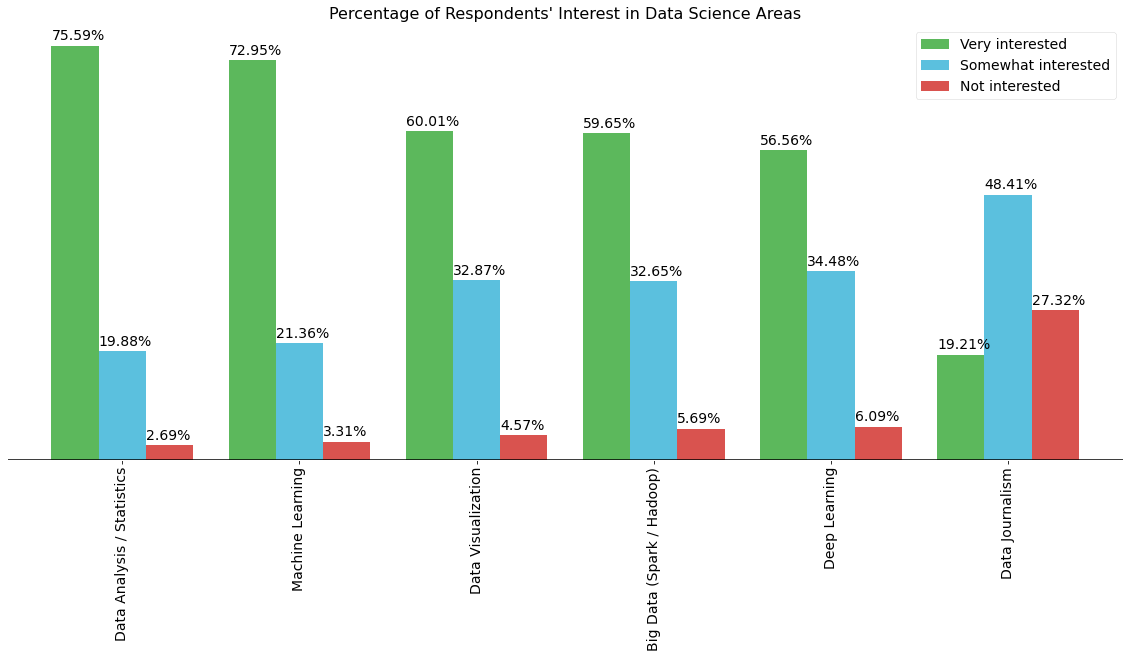

In [5]:
ax = df_sorted_values.plot(kind='bar',
            figsize=(20,8),
            width=0.8,
            color=['#5cb85c','#5bc0de','#d9534f'])

#plot values
ax.set_facecolor('white') # background color = white
ax.tick_params(axis='x', colors='black', labelsize=14) # display x axis with size and color
ax.axhline(0, color='black') # draw the x axis line
ax.legend(fontsize=14, facecolor='white') # display legend background color = white and fontsize
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize = 16)
ax.tick_params(top=False, left=False, right=False, labelleft=False) # remove top,left,right and left label


for p in ax.patches:   #display the percentages above the bars
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}%'.format(height), (x, y + height + 1),fontsize=14)

In [6]:
crime_df=pd.read_csv('https://cocl.us/sanfran_crime_dataset')
crime_df.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Q3.
In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

- Central,
- Southern,
- Bayview,
- Mission,
- Park,
- Richmond,
- Ingleside,
- Taraval,
- Northern, and,
- Tenderloin.
Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe that represents the total number of crimes in each neighborhood.

In [7]:
crime_df.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)
crime_data = crime_df.groupby(['Neighborhood']).size().reset_index(name='Count')
crime_data

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [8]:
# install folium
!pip install folium

import folium
print('Installed Folium')

Installed Folium


Q4
Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

it is centred around San Francisco, you use a zoom level of 12, you use fill_color = 'YlOrRd', you define fill_opacity = 0.7, you define line_opacity=0.2, and, you define a legend and use the default threshold scale.

Generate the map

In [9]:
# download the map of sanfranciso
!wget https://cocl.us/sanfran_geojson -O sanfran_geo.json

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [10]:
# Ready the map
lat = 37.7749
long = -122.4194

sanfran_map= folium.Map(location=[lat,long], zoom_start=12)
sanfran_map

In [11]:
# Plot the choropleth map
san = r'sanfran_geo.json'

sanfran_map.choropleth(
    geo_data=san,
    data=crime_data,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset= True
)
sanfran_map

C:\Users\LocaL\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'sanfran_geo.json'